In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime as dt
from collections import Counter

In [2]:
data = pd.read_csv(r'C:\Users\banga\OneDrive\Desktop\Internship\DATA SETS\Coffee Sales.csv')

In [3]:
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
data.shape

(1133, 6)

In [5]:
data.drop(columns=['date'],inplace=True)

In [6]:
data['Month']=pd.to_datetime(data['datetime']).dt.month_name(locale='English')
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
data['Day'] = pd.to_datetime(data['datetime']).dt.weekday.map(day_map)
data['Hour']= pd.to_datetime(data['datetime']).dt.hour
data.head()

,datetime,cash_type,card,money,coffee_name,Month,Day,Hour
0,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,March,Friday,10
1,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,March,Friday,12
2,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,March,Friday,12
3,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,March,Friday,13
4,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,March,Friday,13


In [7]:
data = data[['datetime','Month','Day','Hour','coffee_name','money','cash_type','card']]
data.head()

,datetime,Month,Day,Hour,coffee_name,money,cash_type,card
0,2024-03-01 10:15:50.520,March,Friday,10,Latte,38.7,card,ANON-0000-0000-0001
1,2024-03-01 12:19:22.539,March,Friday,12,Hot Chocolate,38.7,card,ANON-0000-0000-0002
2,2024-03-01 12:20:18.089,March,Friday,12,Hot Chocolate,38.7,card,ANON-0000-0000-0002
3,2024-03-01 13:46:33.006,March,Friday,13,Americano,28.9,card,ANON-0000-0000-0003
4,2024-03-01 13:48:14.626,March,Friday,13,Latte,38.7,card,ANON-0000-0000-0004


In [8]:
data.shape

(1133, 8)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     1133 non-null   object 
 1   Month        1133 non-null   object 
 2   Day          1133 non-null   object 
 3   Hour         1133 non-null   int32  
 4   coffee_name  1133 non-null   object 
 5   money        1133 non-null   float64
 6   cash_type    1133 non-null   object 
 7   card         1044 non-null   object 
dtypes: float64(1), int32(1), object(6)
memory usage: 66.5+ KB


In [10]:
data.describe()

,Hour,money
count,1133.000000,1133.000000
mean,14.552515,33.105808
std,4.084588,5.035366
min,7.000000,18.120000
25%,11.000000,28.900000
50%,14.000000,32.820000
75%,18.000000,37.720000
max,22.000000,40.000000


In [11]:
data.isnull().sum()

datetime        0
Month           0
Day             0
Hour            0
coffee_name     0
money           0
cash_type       0
card           89
dtype: int64

In [12]:
data = data.fillna(data['card'].mode())

In [13]:
data['card'].duplicated().value_counts()

card
True     686
False    447
Name: count, dtype: int64

In [14]:
coffees_sold = data['coffee_name'].value_counts()
coffees_sold

coffee_name
Americano with Milk    268
Latte                  243
Cappuccino             196
Americano              169
Cortado                 99
Hot Chocolate           74
Espresso                49
Cocoa                   35
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Americano with Milk'),
  Text(1, 0, 'Latte'),
  Text(2, 0, 'Cappuccino'),
  Text(3, 0, 'Americano'),
  Text(4, 0, 'Cortado'),
  Text(5, 0, 'Hot Chocolate'),
  Text(6, 0, 'Espresso'),
  Text(7, 0, 'Cocoa')])

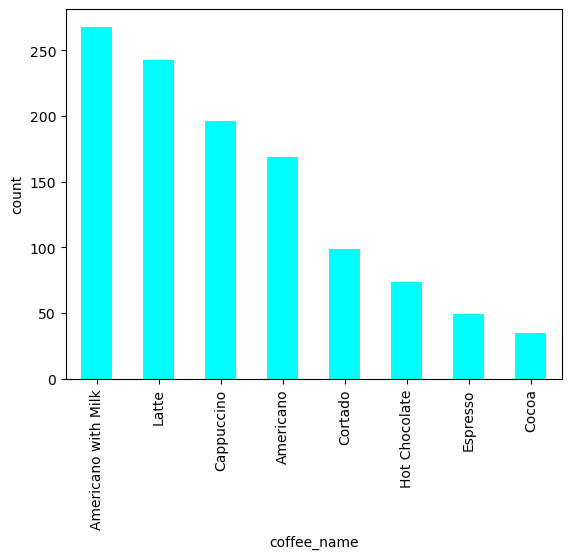

In [15]:
coffees_sold.plot(kind='bar',color='aqua')
plt.ylabel('count')
plt.xticks(rotation=90)

#### As shown in the bar chart above, Americano with Milk & Latte, and Cappuccino are top selling coffee type,while cocoa and espresso have the lowest sales.

In [17]:
sales_by_cash_type=data['cash_type'].value_counts()
sales_by_cash_type

cash_type
card    1044
cash      89
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, 'card'), Text(1, 0, 'cash')])

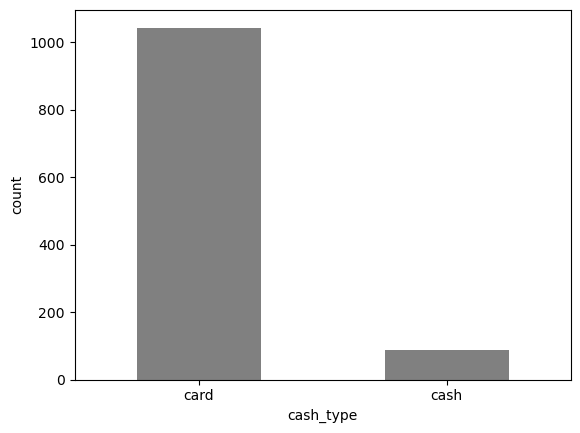

In [18]:
sales_by_cash_type.plot(kind='bar',color='grey')
plt.ylabel('count')
plt.xticks(rotation=360)

#### The above plot shows that there are more than thousand coffees sold by card type and by cash type less than hundred coffees are sold.

In [20]:
Coffeescash_type = data.groupby(by='coffee_name')['cash_type'].value_counts()
Coffeescash_type

coffee_name          cash_type
Americano            card         155
                     cash          14
Americano with Milk  card         253
                     cash          15
Cappuccino           card         181
                     cash          15
Cocoa                card          31
                     cash           4
Cortado              card          94
                     cash           5
Espresso             card          44
                     cash           5
Hot Chocolate        card          68
                     cash           6
Latte                card         218
                     cash          25
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Latte'),
  Text(1, 0, 'Hot Chocolate'),
  Text(2, 0, 'Americano'),
  Text(3, 0, 'Americano with Milk'),
  Text(4, 0, 'Cocoa'),
  Text(5, 0, 'Cortado'),
  Text(6, 0, 'Espresso'),
  Text(7, 0, 'Cappuccino')])

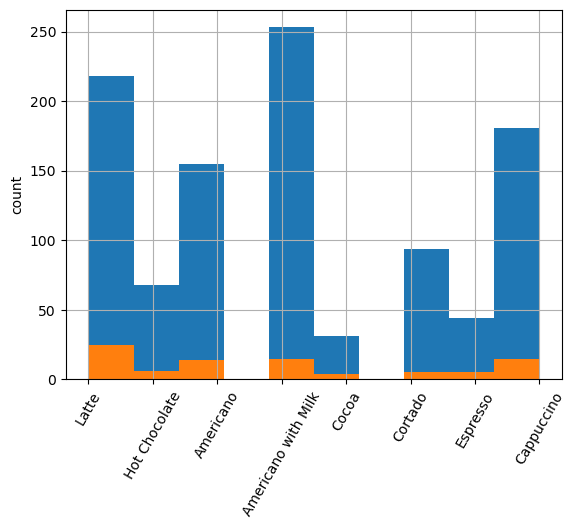

In [21]:
Coffeescash_type = data.groupby(by='cash_type')['coffee_name'].hist()
plt.ylabel('count')
plt.xticks(rotation=60)

#### The above bar plot shows each coffee type sales by different modes of cash type, and by card mode of payment more sales are recorded.

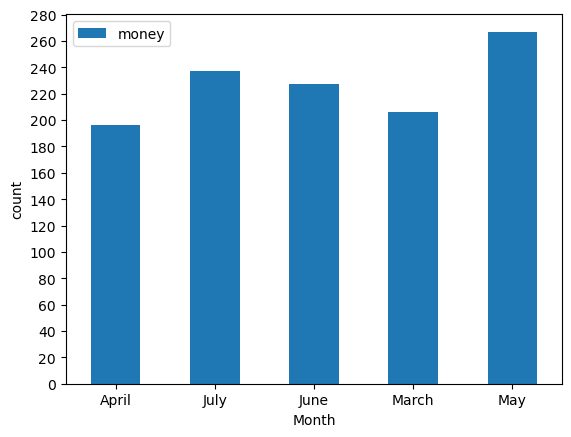

In [23]:
pd.pivot_table(data,values='money',index='Month',aggfunc='count').plot(kind='bar')
plt.xticks(rotation=360)
plt.ylabel('count')
plt.locator_params(nbins=15)

#### The above plot shows that More revenve is generated during May month looks like to be more sales than in other months.

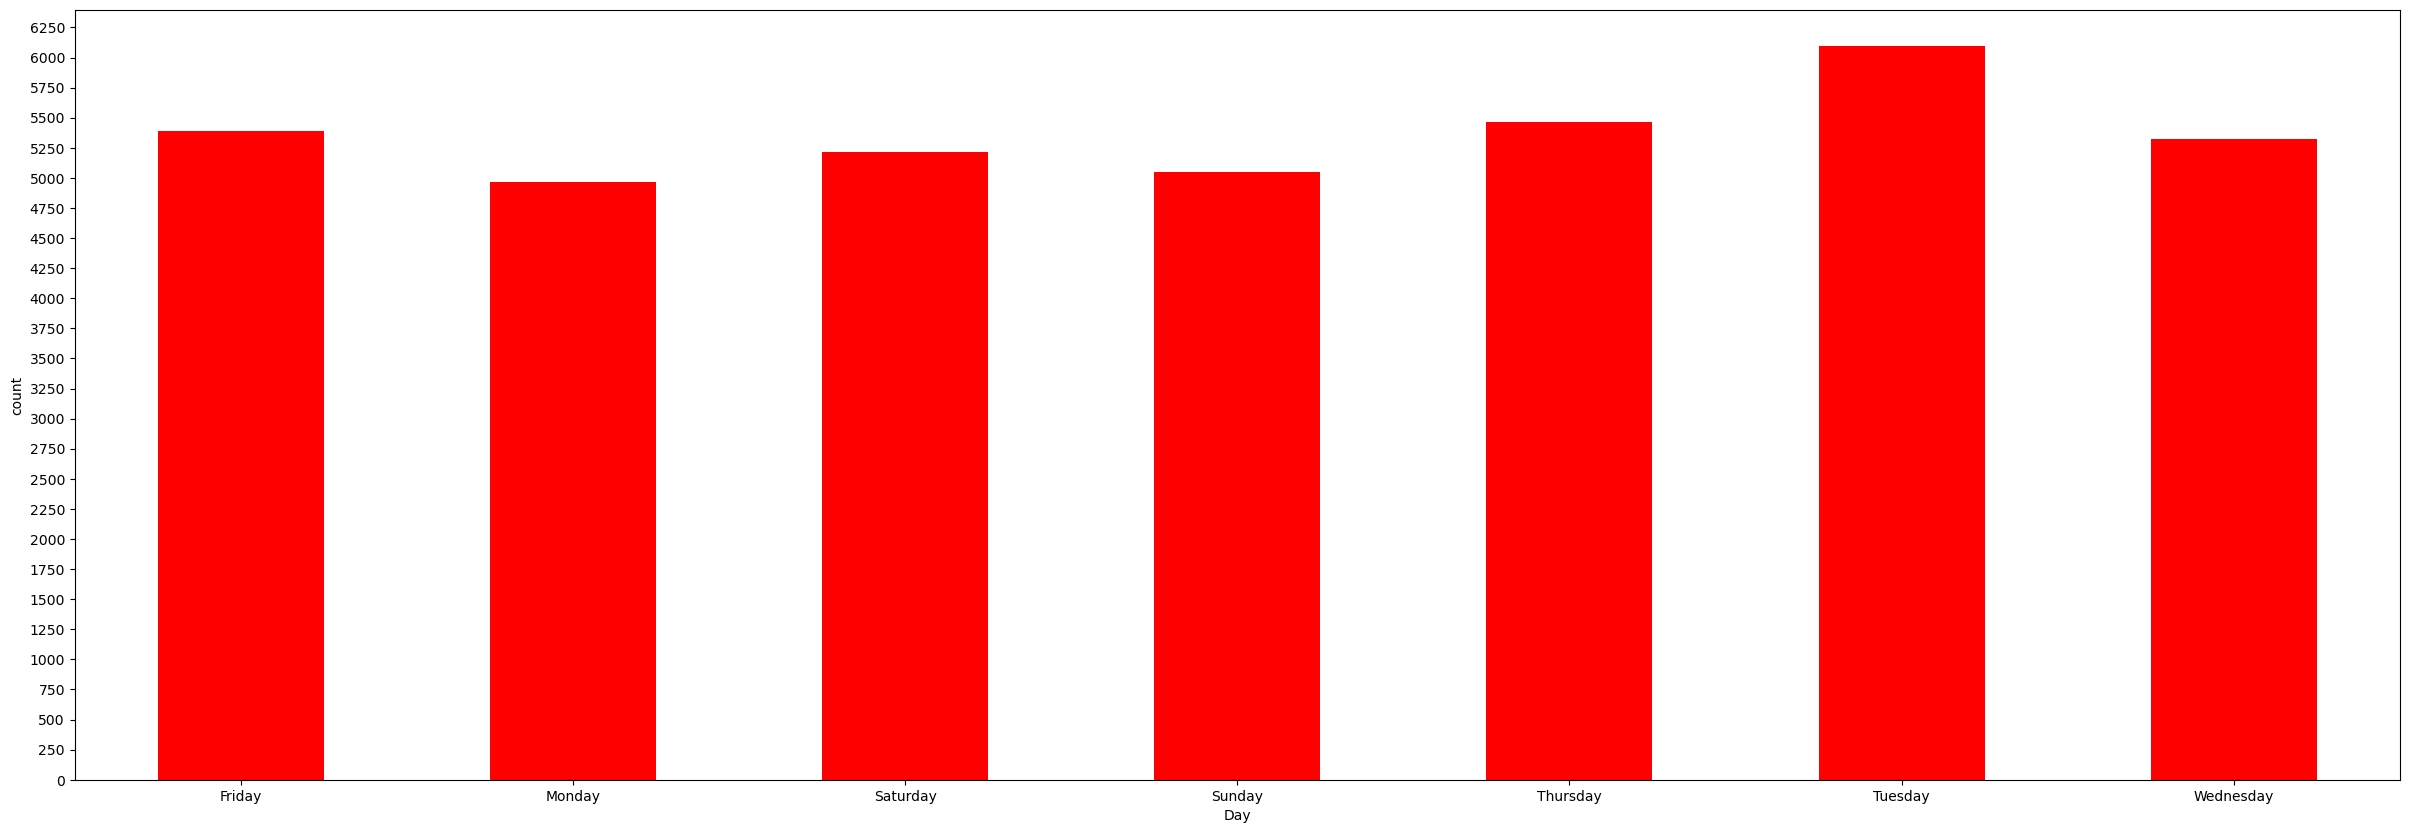

In [25]:
plt.figure(figsize=(30,10))
data.groupby('Day')['money'].sum().plot(kind='bar',color='red')
plt.xticks(rotation=360)
plt.ylabel('count')
plt.locator_params(nbins=30)

#### The bar chart reveals that Tuesday has the highest sales of the week, while sales on the other days are relatively similar.

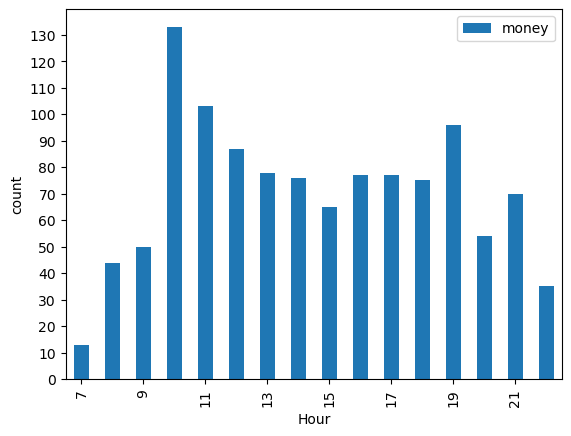

In [27]:
pd.pivot_table(data,values='money',index='Hour',aggfunc='count').plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.locator_params(nbins=15)

#### The above plot shows that More revenve is generated during the hours 10 & 11 in the moring times and 4 & 5 in the evening time and 7 in the night time.

In [29]:
coffee_money = data.groupby('coffee_name')['money'].sum()
coffee_money

coffee_name
Americano              4644.54
Americano with Milk    8601.94
Cappuccino             7333.14
Cocoa                  1295.94
Cortado                2745.08
Espresso               1100.62
Hot Chocolate          2778.48
Latte                  9009.14
Name: money, dtype: float64

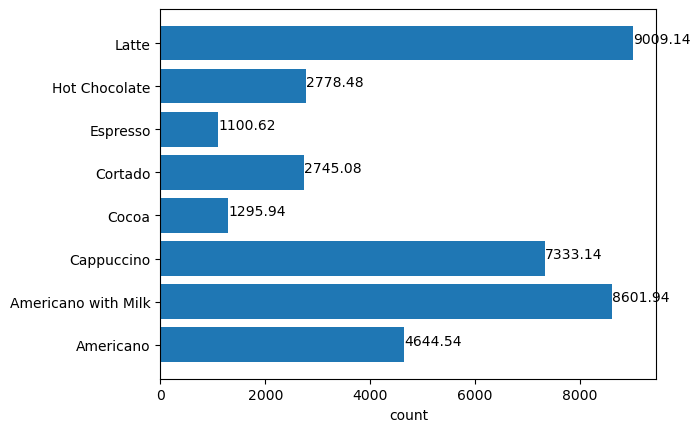

In [30]:
plt.barh(coffee_money.index,coffee_money.values)
style.use('ggplot')
plt.xlabel('count')
for i,v in enumerate(coffee_money):
    plt.text(v, i, str(v))
plt.show()

#### The above plot tells that more revenue is generated from the coffee Latte and less revenue is generated by the Espresso.

# Americano Month wise, Day wise, Hour wise Sales

In [33]:
Americano_Month = data[data['coffee_name']=='Americano']['Month'].value_counts()
Americano_Month

Month
May      48
March    36
July     36
April    35
June     14
Name: count, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, 'May'),
  Text(1, 0, 'March'),
  Text(2, 0, 'July'),
  Text(3, 0, 'April'),
  Text(4, 0, 'June')])

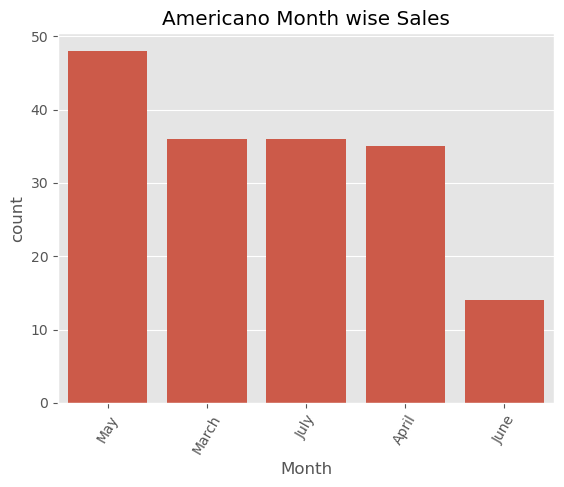

In [34]:
sb.barplot(x=Americano_Month.index,y=Americano_Month.values)
plt.ylabel('count')
plt.title('Americano Month wise Sales')
plt.xticks(rotation=60)

#### The above plot we shows that in the month of may Americano sales are high while in the months march, july, april are relatively similar less sales are recorded in the june month.

In [36]:
Americano_Day = data[data['coffee_name']=='Americano']['Day'].value_counts()
Americano_Day

Day
Monday       37
Tuesday      26
Friday       25
Thursday     24
Wednesday    23
Saturday     17
Sunday       17
Name: count, dtype: int64

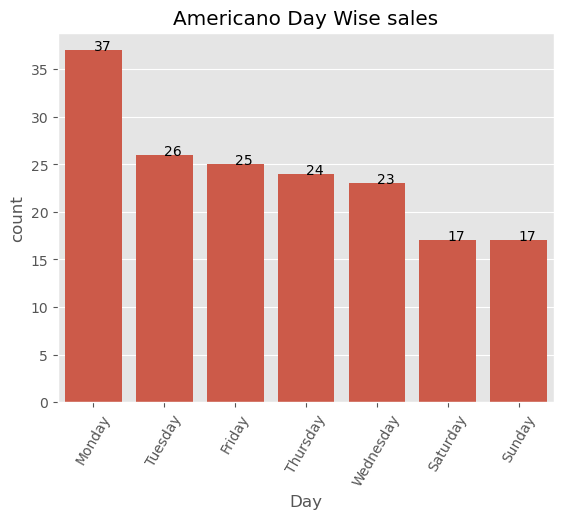

In [37]:
sb.barplot(x=Americano_Day.index,y=Americano_Day.values)
plt.ylabel('count')
plt.title('Americano Day Wise sales')
plt.xticks(rotation=60)
for i,v in enumerate(Americano_Day):
    plt.text(i, v, str(v))
plt.show()

#### The above plot shows that on monday Americano sales are high while on other days relatively similar, less sales are recoreded on saturday & sunday

In [39]:
Americano_Hour = data[data['coffee_name']=='Americano']['Hour'].value_counts()
Americano_Hour

Hour
11    21
10    20
13    18
14    15
12    14
15    14
16    10
8     10
17     9
18     9
9      8
7      5
19     5
22     5
21     5
20     1
Name: count, dtype: int64

Text(0.5, 1.0, 'Americano Hourly Sales')

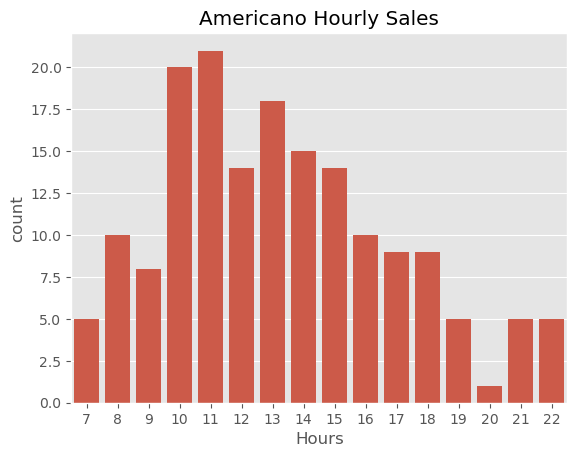

In [40]:
sb.barplot(x=Americano_Hour.index,y=Americano_Hour.values)
plt.xlabel('Hours')
plt.ylabel('count')
plt.title('Americano Hourly Sales')

#### The above plot shows that during the hours 11 & 10  Americano sales are high less sales are recoreded during night 20 and during other hours the sales are moderate.

# Americano with Milk Month wise, Day wise, Hour wise Sales

In [43]:
Americano_With_Milk_Month = data[data['coffee_name']=='Americano with Milk']['Month'].value_counts()
Americano_With_Milk_Month

Month
June     69
July     65
May      58
April    42
March    34
Name: count, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, 'June'),
  Text(1, 0, 'July'),
  Text(2, 0, 'May'),
  Text(3, 0, 'April'),
  Text(4, 0, 'March')])

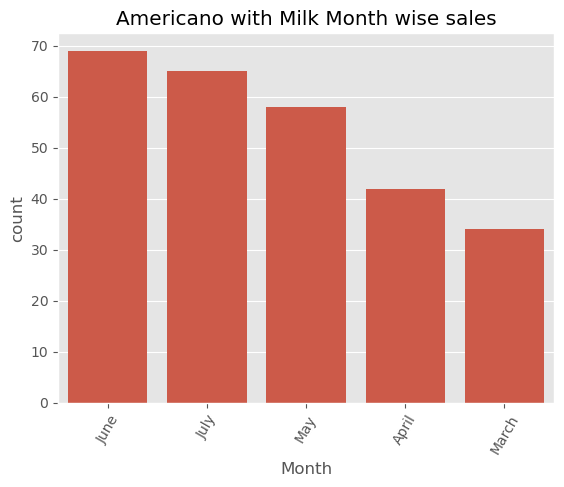

In [44]:
sb.barplot(x=Americano_With_Milk_Month.index,y=Americano_With_Milk_Month.values)
plt.ylabel('count')
plt.title('Americano with Milk Month wise sales')
plt.xticks(rotation=60)

#### The above plot shows that Americano with Milk sales are high in the june month, less sales are recoreded in the march month and in the other months sales are moderate.

In [46]:
Americano_With_Milk_Day = data[data['coffee_name']=='Americano with Milk']['Day'].value_counts()
Americano_With_Milk_Day

Day
Tuesday      54
Saturday     48
Wednesday    35
Friday       34
Sunday       34
Monday       32
Thursday     31
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Tuesday'),
  Text(1, 0, 'Saturday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Friday'),
  Text(4, 0, 'Sunday'),
  Text(5, 0, 'Monday'),
  Text(6, 0, 'Thursday')])

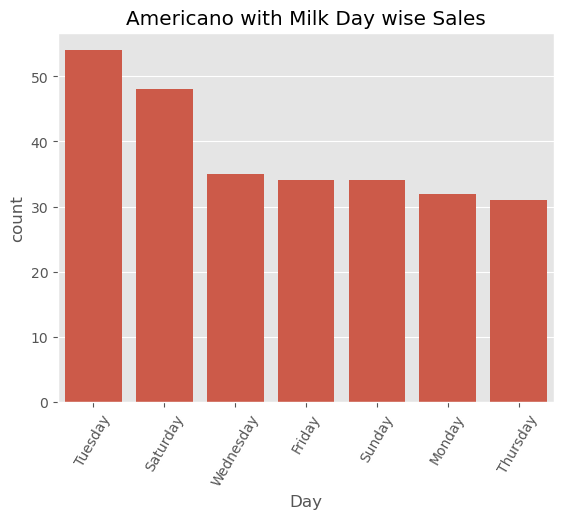

In [47]:
sb.barplot(x=Americano_With_Milk_Day.index,y=Americano_With_Milk_Day.values)
plt.ylabel('count')
plt.title('Americano with Milk Day wise Sales')
plt.xticks(rotation=60)

#### The above plot shows that Americano with Milk sales are high on tuesday, less sales are recoreded on thursday and in the other days sales are moderate.

In [49]:
Americano_With_Milk_Hour = data[data['coffee_name']=='Americano with Milk']['Hour'].value_counts()
Americano_With_Milk_Hour

Hour
10    31
12    26
11    25
21    25
19    18
16    18
14    18
13    18
18    16
9     16
15    15
20    12
17    11
22     8
8      7
7      4
Name: count, dtype: int64

Text(0.5, 1.0, 'Americano with Milk Hourly Sales')

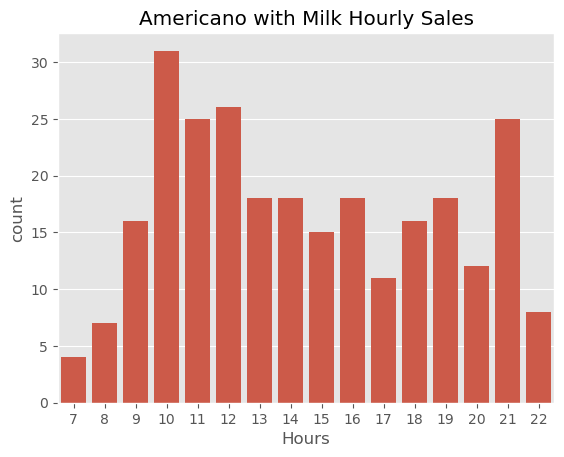

In [50]:
sb.barplot(x=Americano_With_Milk_Hour.index,y=Americano_With_Milk_Hour.values)
plt.xlabel('Hours')
plt.ylabel('count')
plt.title('Americano with Milk Hourly Sales')

#### The above plot shows that Americano with Milk sales are high during the hours 10,11,12 & 21, less sales are recoreded during the hours 7,8 & 22 and in the other hours sales are moderate.

# Cappuccino Month wise, Day wise, Hour wise Sales

In [53]:
Cappucciono_Month = data[data['coffee_name']=='Cappuccino']['Month'].value_counts()
Cappucciono_Month

Month
May      55
June     46
April    43
July     32
March    20
Name: count, dtype: int64

Text(0.5, 1.0, 'Cappuccino Month wise Sales')

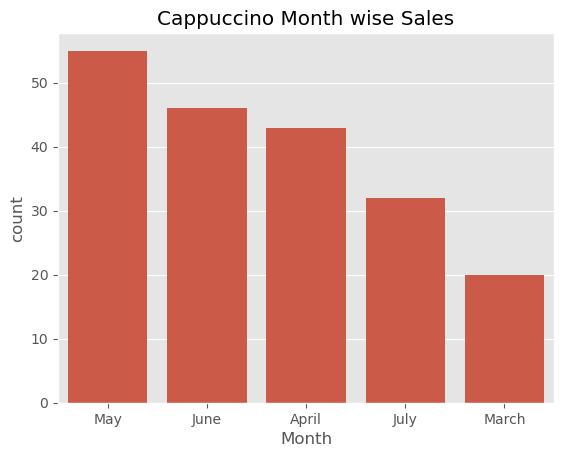

In [54]:
sb.barplot(x=Cappucciono_Month.index,y=Cappucciono_Month.values)
plt.ylabel('count')
plt.title('Cappuccino Month wise Sales')

#### The above plot shows that Cappuccino sales are high in the may month, less sales are recoreded in the march month and in the other months sales are moderate.

In [56]:
Cappuccino_Day = data[data['coffee_name']=='Cappuccino']['Day'].value_counts()
Cappuccino_Day

Day
Saturday     31
Monday       31
Wednesday    29
Sunday       28
Thursday     27
Tuesday      27
Friday       23
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Saturday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Sunday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Friday')])

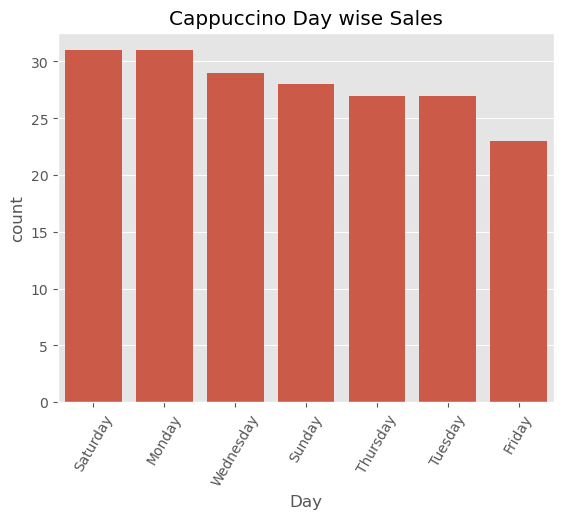

In [57]:
sb.barplot(x=Cappuccino_Day.index,y=Cappuccino_Day.values)
plt.ylabel('count')
plt.title('Cappuccino Day wise Sales')
plt.xticks(rotation=60)

#### From the above plot we can see that Cappuccino sales are high on the saturday & Monday, less sales are recoreded on friday and in the other days sales are moderate.

In [59]:
Cappuccino_Hour = data[data['coffee_name']=='Cappuccino']['Hour'].value_counts()
Cappuccino_Hour

Hour
19    34
17    18
11    16
12    15
14    13
20    13
21    13
16    12
18    12
13    10
10    10
15     8
8      8
22     7
9      6
7      1
Name: count, dtype: int64

Text(0.5, 1.0, 'Cappuccino Hourly Sales')

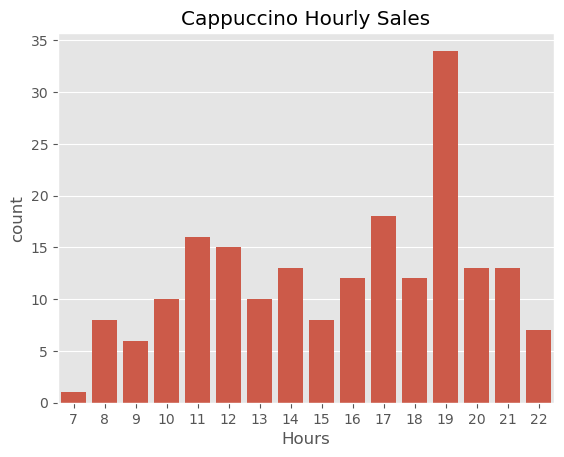

In [60]:
sb.barplot(x=Cappuccino_Hour.index,y=Cappuccino_Hour.values)
plt.xlabel('Hours')
plt.ylabel('count')
plt.title('Cappuccino Hourly Sales')

#### The above plot shows that Cappuccino sales are high during the hours 19 & 17 , less sales are recoreded during the hours 7 and in the other hours sales are moderate.

# Cocoa Month wise, Day wise, Hour wise Sales

In [63]:
Cocoa_Month = data[data['coffee_name']=='Cocoa']['Month'].value_counts()
Cocoa_Month

Month
May      9
July     9
March    6
April    6
June     5
Name: count, dtype: int64

Text(0.5, 1.0, 'Cocoa Month wise Sales')

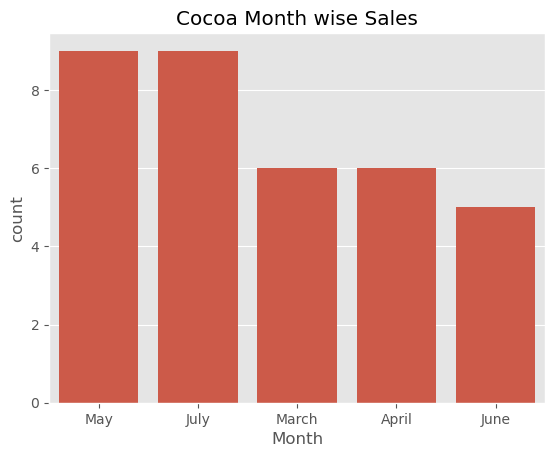

In [64]:
sb.barplot(x=Cocoa_Month.index,y=Cocoa_Month.values)
plt.ylabel('count')
plt.title('Cocoa Month wise Sales')

#### The above plot shows that Cocoa sales are high in the may & july month, less sales are recoreded in the june month and in the other months sales are moderate.

In [66]:
Cocoa_Day = data[data['coffee_name']=='Cocoa']['Day'].value_counts()
Cocoa_Day

Day
Tuesday      9
Friday       7
Wednesday    6
Saturday     6
Sunday       3
Monday       3
Thursday     1
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Tuesday'),
  Text(1, 0, 'Friday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Saturday'),
  Text(4, 0, 'Sunday'),
  Text(5, 0, 'Monday'),
  Text(6, 0, 'Thursday')])

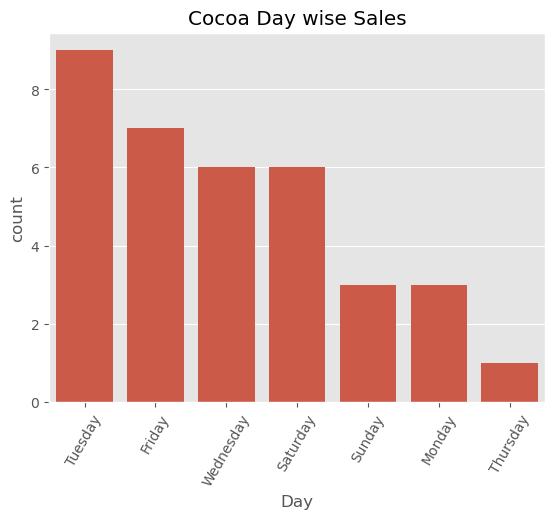

In [67]:
sb.barplot(x=Cocoa_Day.index,y=Cocoa_Day.values)
plt.ylabel('count')
plt.title('Cocoa Day wise Sales')
plt.xticks(rotation=60)

#### The above plot shows that Cocoa sales are high on tuesday, less sales are recoreded on thursday and in the other days sales are moderate.

In [69]:
Cocoa_Hour = data[data['coffee_name']=='Cocoa']['Hour'].value_counts()
Cocoa_Hour

Hour
20    6
17    4
10    4
14    4
16    3
12    3
19    2
13    2
18    2
9     1
11    1
8     1
22    1
21    1
Name: count, dtype: int64

Text(0.5, 1.0, 'Cocoa Hourly Sales')

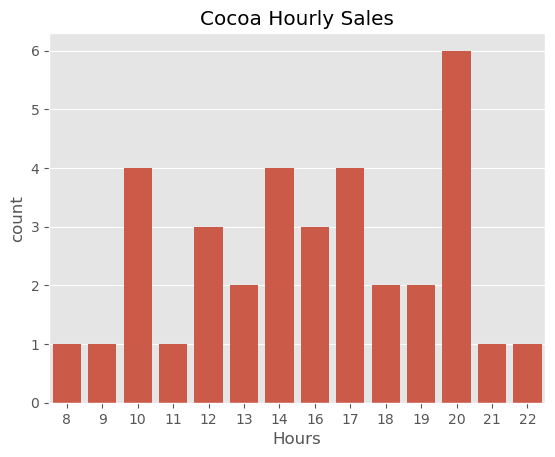

In [70]:
sb.barplot(x=Cocoa_Hour.index,y=Cocoa_Hour.values)
plt.xlabel('Hours')
plt.ylabel('count')
plt.title('Cocoa Hourly Sales')

#### The above plot shows that Cocoa sales are high during the hours 20 , and in the other hours sales are moderate.

 # Cortado Month wise, Day wise, Hour wise Sales

In [73]:
Cortado_Month = data[data['coffee_name']=='Cortado']['Month'].value_counts()
Cortado_Month

Month
March    30
April    19
June     19
May      17
July     14
Name: count, dtype: int64

Text(0.5, 1.0, 'Cortado Month wise Sales')

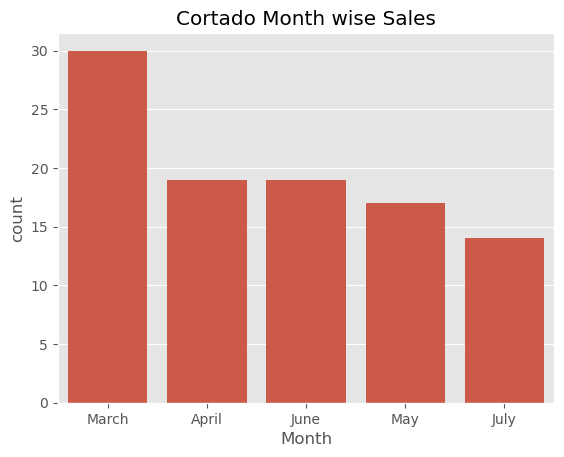

In [74]:
sb.barplot(x=Cortado_Month.index,y=Cortado_Month.values)
plt.ylabel('count')
plt.title('Cortado Month wise Sales')

#### The above plot shows that Cortado sales are high in the march month, less sales are recoreded in the july month and in the other months sales are moderate.

In [76]:
Cortado_Day = data[data['coffee_name']=='Cortado']['Day'].value_counts()
Cortado_Day

Day
Tuesday      18
Wednesday    18
Friday       16
Sunday       14
Thursday     14
Monday       11
Saturday      8
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Tuesday'),
  Text(1, 0, 'Wednesday'),
  Text(2, 0, 'Friday'),
  Text(3, 0, 'Sunday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Monday'),
  Text(6, 0, 'Saturday')])

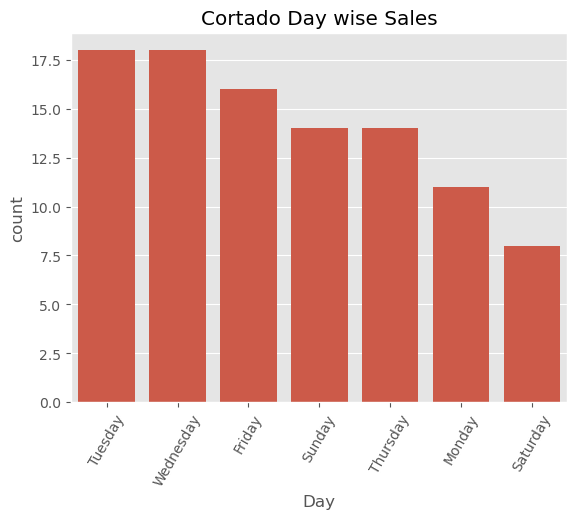

In [77]:
sb.barplot(x=Cortado_Day.index,y=Cortado_Day.values)
plt.ylabel('count')
plt.title('Cortado Day wise Sales')
plt.xticks(rotation=60)

#### The above plot shows that Cortado sales are high on tuesday, less sales are recoreded on saturday and in the other days sales are moderate.

In [79]:
Cortado_Hour = data[data['coffee_name']=='Cortado']['Hour'].value_counts()
Cortado_Hour

Hour
11    13
13    12
16    12
10     8
12     7
17     6
14     6
8      6
19     5
18     5
20     5
9      5
15     3
21     3
22     2
7      1
Name: count, dtype: int64

Text(0.5, 1.0, 'Cortado Hourly Sales')

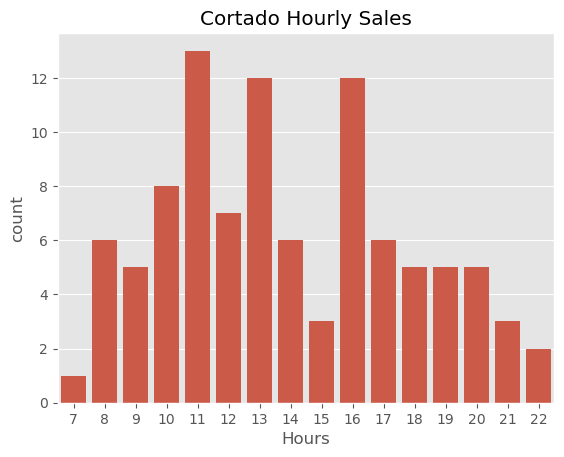

In [80]:
sb.barplot(x=Cortado_Hour.index,y=Cortado_Hour.values)
plt.xlabel('Hours')
plt.ylabel('count')
plt.title('Cortado Hourly Sales')

#### The above plot shows that Cortado sales are high during 11 , and less sales are recorded during the 7 and in the other hours sales are moderate.

# Espresso Month wise, Day wise,Hour wise Sales

In [83]:
Espresso_Month= data[data['coffee_name']=='Espresso']['Month'].value_counts()
Espresso_Month

Month
July     14
March    10
June     10
May       8
April     7
Name: count, dtype: int64

Text(0.5, 1.0, 'Espresso Month wise sales')

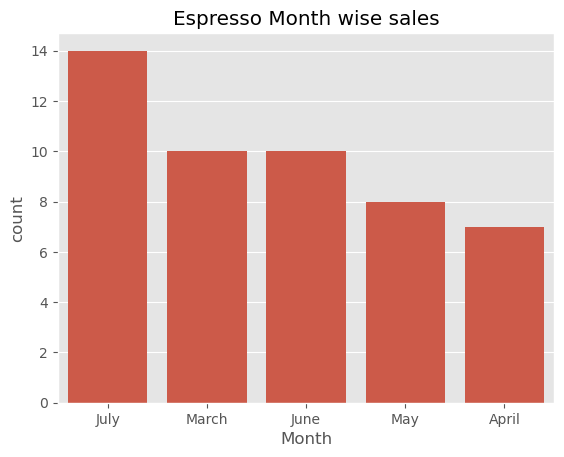

In [84]:
sb.barplot(x=Espresso_Month.index,y=Espresso_Month.values)
plt.ylabel('count')
plt.title('Espresso Month wise sales')

#### The above plot shows that espresso sales are high in the july month, less sales are recoreded in the april month and in the other months sales are moderate.

In [86]:
Espresso_Day= data[data['coffee_name']=='Espresso']['Day'].value_counts()
Espresso_Day

Day
Wednesday    13
Thursday      9
Sunday        8
Friday        8
Monday        4
Saturday      4
Tuesday       3
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Wednesday'),
  Text(1, 0, 'Thursday'),
  Text(2, 0, 'Sunday'),
  Text(3, 0, 'Friday'),
  Text(4, 0, 'Monday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Tuesday')])

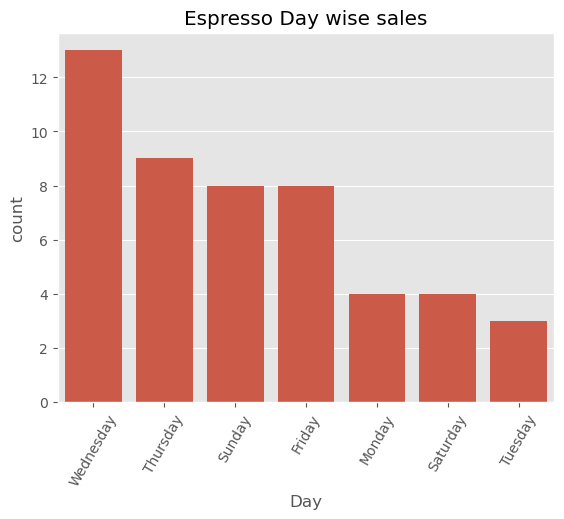

In [87]:
sb.barplot(x=Espresso_Day.index,y=Espresso_Day.values)
plt.ylabel('count')
plt.title('Espresso Day wise sales')
plt.xticks(rotation=60)

#### The above plot shows that espresso sales are high on wednesday, less sales are recoreded on tuesday and in the other days sales are moderate.

In [89]:
Espresso_Hour = data[data['coffee_name']=='Espresso']['Hour'].value_counts()
Espresso_Hour

Hour
12    6
11    6
14    5
16    5
18    5
15    4
17    4
13    3
9     3
20    3
10    2
19    1
22    1
21    1
Name: count, dtype: int64

Text(0.5, 1.0, 'Espresso Hourly Sales')

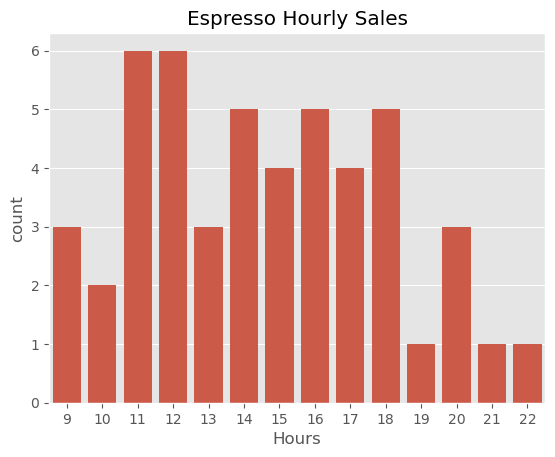

In [90]:
sb.barplot(x=Espresso_Hour.index,y=Espresso_Hour.values)
plt.xlabel('Hours')
plt.ylabel('count')
plt.title('Espresso Hourly Sales')

#### The above plot shows that espresso sales are high during the hours 11 & 12 , and less sales are recorded during the 19,21 & 22 in the other hours sales are moderate.

# Latte Month wise, Day wise, Hour wise Sales

In [93]:
Latte_Month = data[data['coffee_name']=='Latte']['Month'].value_counts()
Latte_Month

Month
May      58
July     56
June     50
March    48
April    31
Name: count, dtype: int64

Text(0.5, 1.0, 'Latte Month wise Sales')

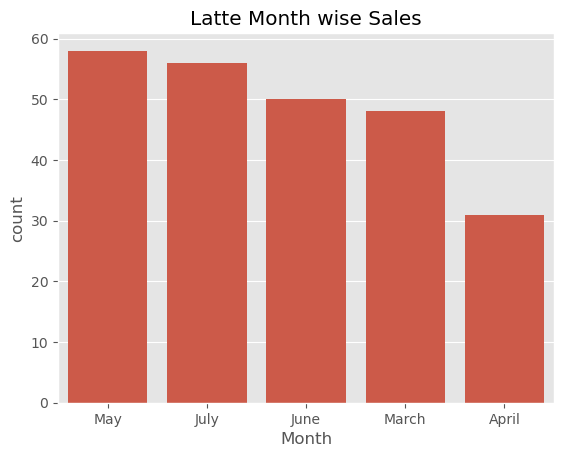

In [94]:
sb.barplot(x=Latte_Month.index,y=Latte_Month.values)
plt.ylabel('count')
plt.title('Latte Month wise Sales')

#### The above plot shows that latte sales are high in the may month, less sales are recoreded in the april month and in the other months sales are moderate.

In [96]:
Latte_Day = data[data['coffee_name']=='Latte']['Day'].value_counts()
Latte_Day

Day
Thursday     46
Friday       37
Saturday     33
Sunday       33
Tuesday      33
Wednesday    33
Monday       28
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Thursday'),
  Text(1, 0, 'Friday'),
  Text(2, 0, 'Saturday'),
  Text(3, 0, 'Sunday'),
  Text(4, 0, 'Tuesday'),
  Text(5, 0, 'Wednesday'),
  Text(6, 0, 'Monday')])

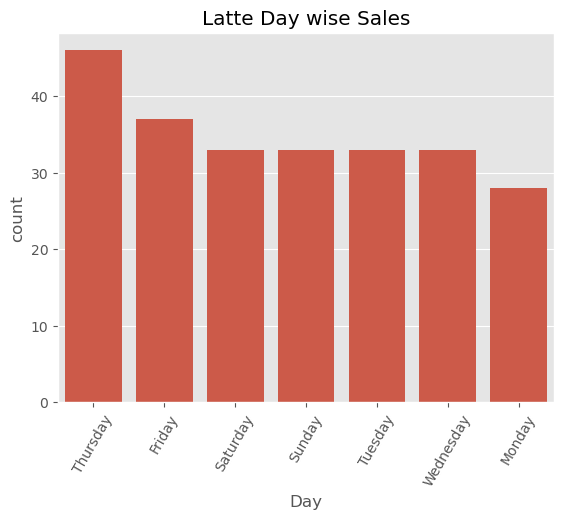

In [97]:
sb.barplot(x=Latte_Day.index,y=Latte_Day.values)
plt.ylabel('count')
plt.title('Latte Day wise Sales')
plt.xticks(rotation=60)

#### The above plot shows that latte sales are high on thursday, less sales are recoreded on monday and in the other days sales are moderate.

In [99]:
Latte_Hour = data[data['coffee_name']=='Latte']['Hour'].value_counts()
Latte_Hour

Hour
10    51
19    22
21    19
17    18
18    16
15    15
14    13
11    13
16    13
12    13
8     12
13    11
9     11
20     8
22     6
7      2
Name: count, dtype: int64

Text(0.5, 1.0, 'Latte Hourly Sales')

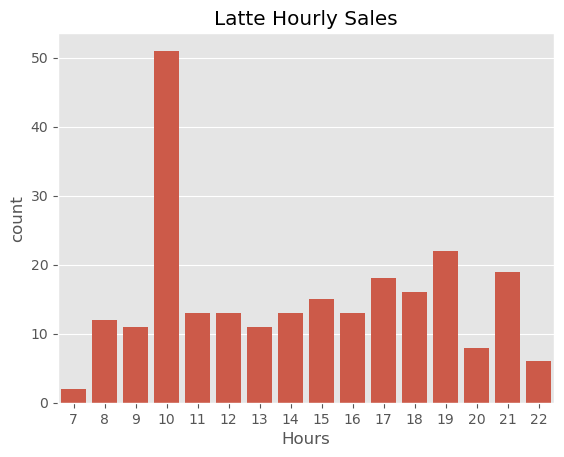

In [100]:
sb.barplot(x=Latte_Hour.index,y=Latte_Hour.values)
plt.xlabel('Hours')
plt.ylabel('count')
plt.title('Latte Hourly Sales')

#### The above plot shows that latte sales are high during the hour 10 , and less sales are recorded during the hour 7 and in the other hours sales are moderate.

# Hot Chocolate Month wise, Day wise,Hour wise Sales

In [103]:
Hot_Chocolate_Month = data[data['coffee_name']=='Hot Chocolate']['Month'].value_counts()
Hot_Chocolate_Month

Month
March    22
May      14
June     14
April    13
July     11
Name: count, dtype: int64

Text(0.5, 1.0, 'Hot Chocolate Month wise sales')

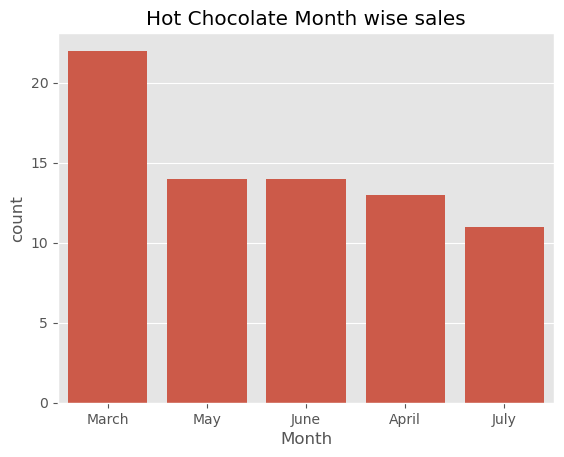

In [104]:
sb.barplot(x=Hot_Chocolate_Month.index,y=Hot_Chocolate_Month.values)
plt.ylabel('count')
plt.title('Hot Chocolate Month wise sales')

#### The above plot shows that Hot Chocolate sales are high in the march month, less sales are recoreded in the july month and in the other months sales are moderate.

In [106]:
Hot_Chocolate_Day = data[data['coffee_name']=='Hot Chocolate']['Day'].value_counts()
Hot_Chocolate_Day

Day
Tuesday      15
Sunday       14
Friday       13
Thursday     12
Wednesday     8
Saturday      7
Monday        5
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Tuesday'),
  Text(1, 0, 'Sunday'),
  Text(2, 0, 'Friday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Wednesday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Monday')])

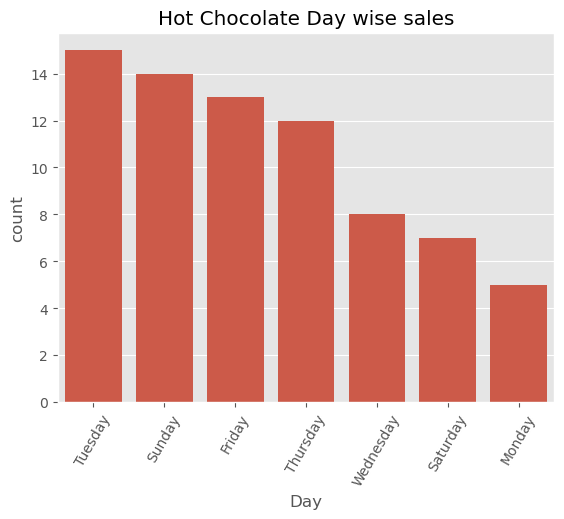

In [107]:
sb.barplot(x=Hot_Chocolate_Day.index,y=Hot_Chocolate_Day.values)
plt.ylabel('count')
plt.title('Hot Chocolate Day wise sales')
plt.xticks(rotation=60)

#### The above plot shows that Hot Chocolate sales are high on tuesday, less sales are recoreded on monday and in the other days sales are moderate.

In [109]:
Hot_Chocolate_Hour = data[data['coffee_name']=='Hot Chocolate']['Hour'].value_counts()
Hot_Chocolate_Hour

Hour
18    10
19     9
11     8
17     7
10     7
15     6
20     6
22     5
16     4
13     4
12     3
21     3
14     2
Name: count, dtype: int64

Text(0.5, 1.0, 'Hot Chocolate Hourly sales')

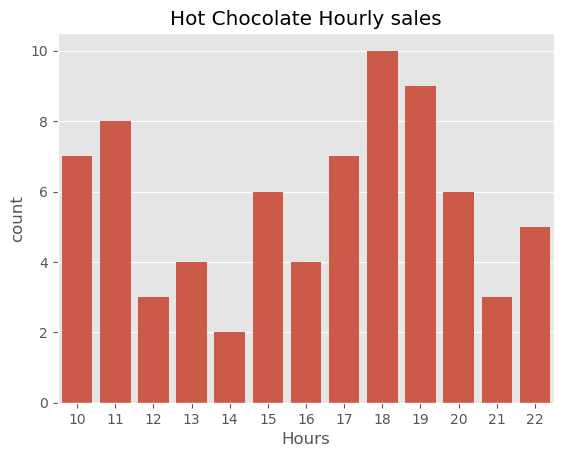

In [110]:
sb.barplot(x=Hot_Chocolate_Hour.index,y=Hot_Chocolate_Hour.values)
plt.xlabel('Hours')
plt.ylabel('count')
plt.title('Hot Chocolate Hourly sales')

#### The above plot shows that Hot Chocolate sales are high during the hour 18 , and less sales are recorded during the hour 14 and in the other hours sales are moderate.

# Month wise Top seller

In [113]:
March_Top = data[data['Month']=='March']['coffee_name'].value_counts()
March_Top

coffee_name
Latte                  48
Americano              36
Americano with Milk    34
Cortado                30
Hot Chocolate          22
Cappuccino             20
Espresso               10
Cocoa                   6
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Latte'),
  Text(1, 0, 'Americano'),
  Text(2, 0, 'Americano with Milk'),
  Text(3, 0, 'Cortado'),
  Text(4, 0, 'Hot Chocolate'),
  Text(5, 0, 'Cappuccino'),
  Text(6, 0, 'Espresso'),
  Text(7, 0, 'Cocoa')])

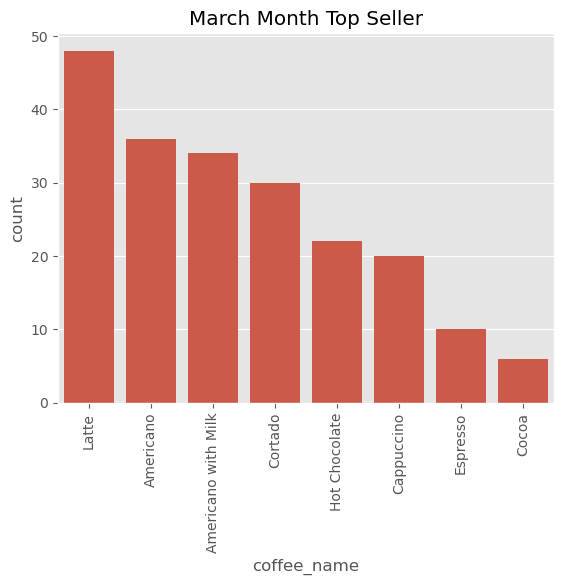

In [114]:
sb.barplot(x=March_Top.index,y=March_Top.values)
plt.ylabel('count')
plt.title('March Month Top Seller')
plt.xticks(rotation=90)

#### The above plot shows that in the month of march latte is the most sold coffee and least sold is cocoa.

In [116]:
April_Top = data[data['Month']=='April']['coffee_name'].value_counts()
April_Top

coffee_name
Cappuccino             43
Americano with Milk    42
Americano              35
Latte                  31
Cortado                19
Hot Chocolate          13
Espresso                7
Cocoa                   6
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Cappuccino'),
  Text(1, 0, 'Americano with Milk'),
  Text(2, 0, 'Americano'),
  Text(3, 0, 'Latte'),
  Text(4, 0, 'Cortado'),
  Text(5, 0, 'Hot Chocolate'),
  Text(6, 0, 'Espresso'),
  Text(7, 0, 'Cocoa')])

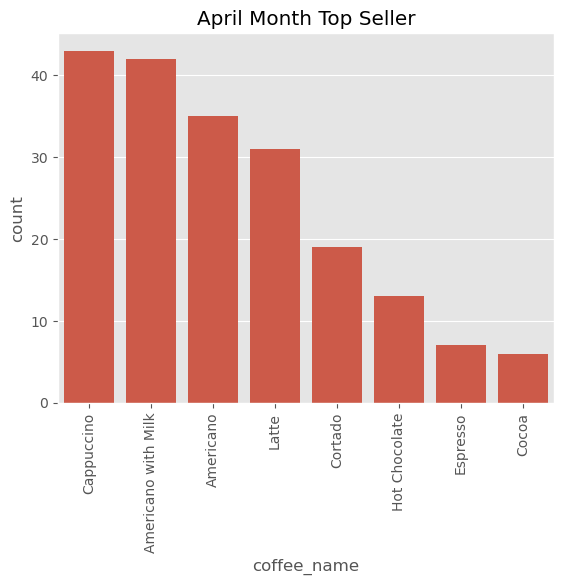

In [117]:
sb.barplot(x=April_Top.index,y=April_Top.values)
plt.ylabel('count')
plt.title('April Month Top Seller')
plt.xticks(rotation=90)

#### The above plot shows that in the month of april cappuccino is the most sold coffee and least sold is cocoa.

In [119]:
May_Top = data[data['Month']=='May']['coffee_name'].value_counts()
May_Top

coffee_name
Latte                  58
Americano with Milk    58
Cappuccino             55
Americano              48
Cortado                17
Hot Chocolate          14
Cocoa                   9
Espresso                8
Name: count, dtype: int64

#### 

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Latte'),
  Text(1, 0, 'Americano with Milk'),
  Text(2, 0, 'Cappuccino'),
  Text(3, 0, 'Americano'),
  Text(4, 0, 'Cortado'),
  Text(5, 0, 'Hot Chocolate'),
  Text(6, 0, 'Cocoa'),
  Text(7, 0, 'Espresso')])

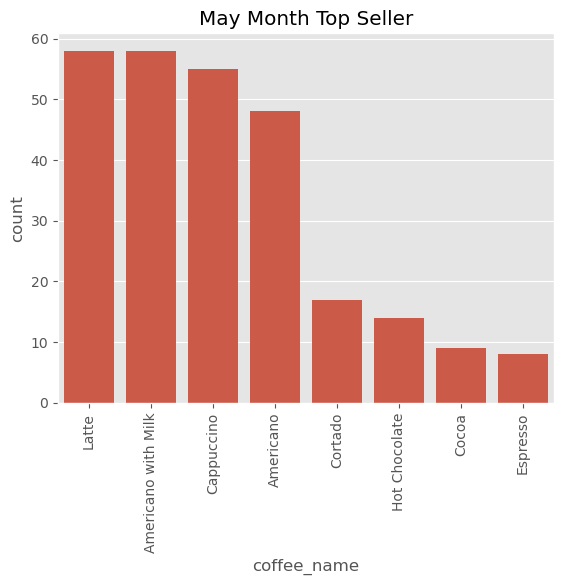

In [121]:
sb.barplot(x=May_Top.index,y=May_Top.values)
plt.ylabel('count')
plt.title('May Month Top Seller')
plt.xticks(rotation=90)

#### 

#### The above plot shows that in the month of may latte & Americano with milk are the most sold coffees and least sold is espresso.

In [124]:
June_Top = data[data['Month']=='June']['coffee_name'].value_counts()
June_Top

coffee_name
Americano with Milk    69
Latte                  50
Cappuccino             46
Cortado                19
Hot Chocolate          14
Americano              14
Espresso               10
Cocoa                   5
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Americano with Milk'),
  Text(1, 0, 'Latte'),
  Text(2, 0, 'Cappuccino'),
  Text(3, 0, 'Cortado'),
  Text(4, 0, 'Hot Chocolate'),
  Text(5, 0, 'Americano'),
  Text(6, 0, 'Espresso'),
  Text(7, 0, 'Cocoa')])

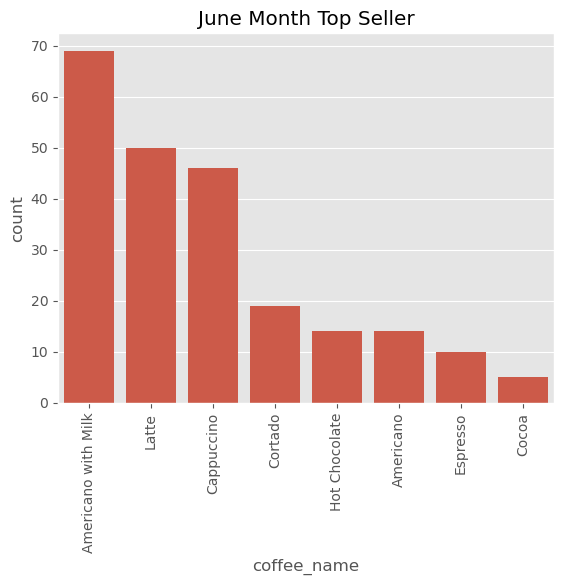

In [125]:
sb.barplot(x=June_Top.index,y=June_Top.values)
plt.ylabel('count')
plt.title('June Month Top Seller')
plt.xticks(rotation=90)

#### The above plot shows that in the month of june Americano with milk is the most sold coffee and least sold is cocoa.

In [127]:
July_Top = data[data['Month']=='July']['coffee_name'].value_counts()
July_Top

coffee_name
Americano with Milk    65
Latte                  56
Americano              36
Cappuccino             32
Espresso               14
Cortado                14
Hot Chocolate          11
Cocoa                   9
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Americano with Milk'),
  Text(1, 0, 'Latte'),
  Text(2, 0, 'Americano'),
  Text(3, 0, 'Cappuccino'),
  Text(4, 0, 'Espresso'),
  Text(5, 0, 'Cortado'),
  Text(6, 0, 'Hot Chocolate'),
  Text(7, 0, 'Cocoa')])

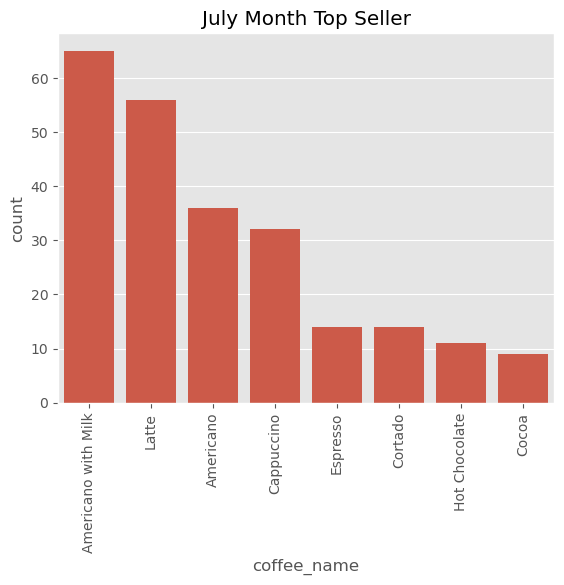

In [128]:
sb.barplot(x=July_Top.index,y=July_Top.values)
plt.ylabel('count')
plt.title('July Month Top Seller')
plt.xticks(rotation=90)

#### The above plot shows that in the month of july Americano with milk is the most sold coffee and least sold is cocoa.

# Day wise Top Seller

In [131]:
Monday_Top= data[data['Day']=='Monday']['coffee_name'].value_counts()
Monday_Top

coffee_name
Americano              37
Americano with Milk    32
Cappuccino             31
Latte                  28
Cortado                11
Hot Chocolate           5
Espresso                4
Cocoa                   3
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Americano'),
  Text(1, 0, 'Americano with Milk'),
  Text(2, 0, 'Cappuccino'),
  Text(3, 0, 'Latte'),
  Text(4, 0, 'Cortado'),
  Text(5, 0, 'Hot Chocolate'),
  Text(6, 0, 'Espresso'),
  Text(7, 0, 'Cocoa')])

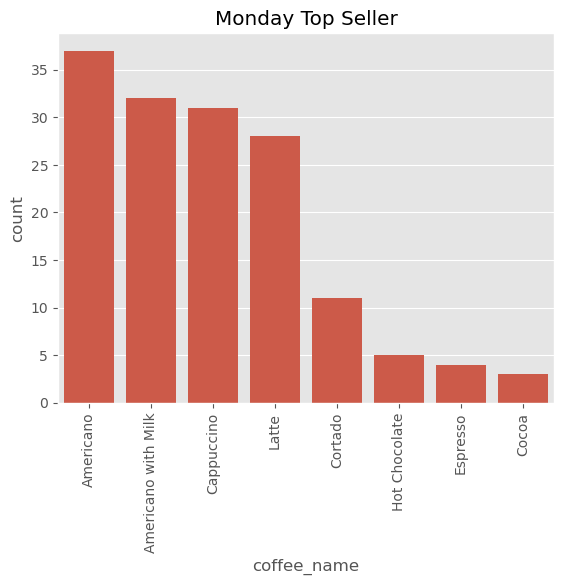

In [132]:
sb.barplot(x=Monday_Top.index,y=Monday_Top.values)
plt.xlabel('coffee_name')
plt.ylabel('count')
plt.title('Monday Top Seller')
plt.xticks(rotation=90)

#### The above plot shows that on monday Americano is the most sold coffee and least sold is cocoa.

In [134]:
Tuesday_Top= data[data['Day']=='Tuesday']['coffee_name'].value_counts()
Tuesday_Top

coffee_name
Americano with Milk    54
Latte                  33
Cappuccino             27
Americano              26
Cortado                18
Hot Chocolate          15
Cocoa                   9
Espresso                3
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Americano with Milk'),
  Text(1, 0, 'Latte'),
  Text(2, 0, 'Cappuccino'),
  Text(3, 0, 'Americano'),
  Text(4, 0, 'Cortado'),
  Text(5, 0, 'Hot Chocolate'),
  Text(6, 0, 'Cocoa'),
  Text(7, 0, 'Espresso')])

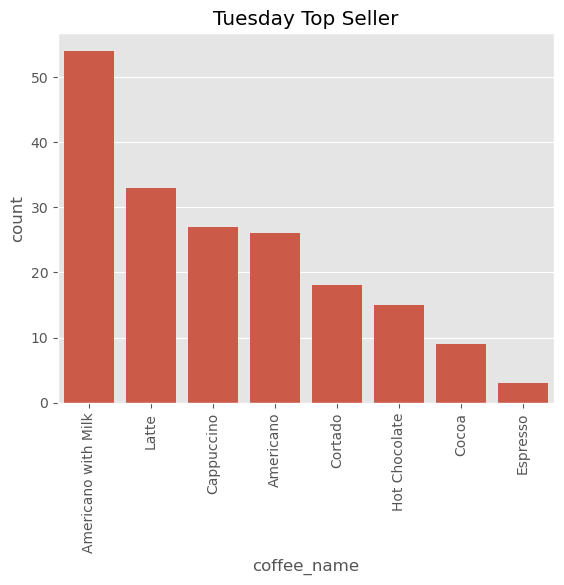

In [135]:
sb.barplot(x=Tuesday_Top.index,y=Tuesday_Top.values)
plt.xlabel('coffee_name')
plt.ylabel('count')
plt.title('Tuesday Top Seller')
plt.xticks(rotation=90)

#### The above plot shows that on tuesday Americano with Milk is the most sold coffee and least sold is espresso.

In [137]:
Wednesday_Top= data[data['Day']=='Wednesday']['coffee_name'].value_counts()
Wednesday_Top

coffee_name
Americano with Milk    35
Latte                  33
Cappuccino             29
Americano              23
Cortado                18
Espresso               13
Hot Chocolate           8
Cocoa                   6
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Americano with Milk'),
  Text(1, 0, 'Latte'),
  Text(2, 0, 'Cappuccino'),
  Text(3, 0, 'Americano'),
  Text(4, 0, 'Cortado'),
  Text(5, 0, 'Espresso'),
  Text(6, 0, 'Hot Chocolate'),
  Text(7, 0, 'Cocoa')])

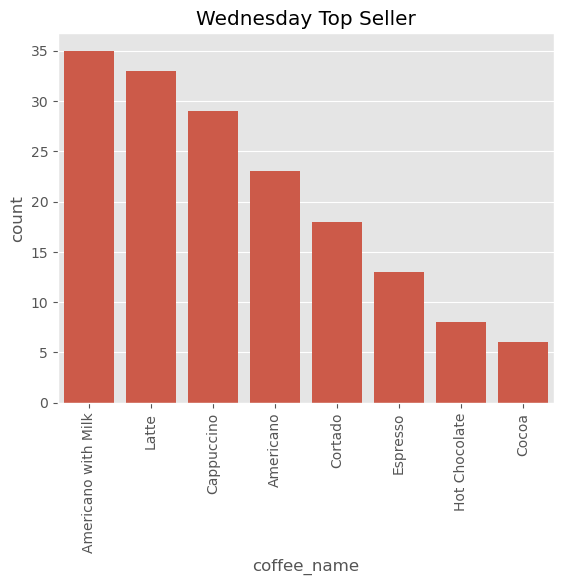

In [138]:
sb.barplot(x=Wednesday_Top.index,y=Wednesday_Top.values)
plt.xlabel('coffee_name')
plt.ylabel('count')
plt.title('Wednesday Top Seller')
plt.xticks(rotation=90)

#### The above plot shows that on wednesday Americano with Milk is the most sold coffee and least sold is cocoa.

In [140]:
Thursday_Top= data[data['Day']=='Thursday']['coffee_name'].value_counts()
Thursday_Top

coffee_name
Latte                  46
Americano with Milk    31
Cappuccino             27
Americano              24
Cortado                14
Hot Chocolate          12
Espresso                9
Cocoa                   1
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Latte'),
  Text(1, 0, 'Americano with Milk'),
  Text(2, 0, 'Cappuccino'),
  Text(3, 0, 'Americano'),
  Text(4, 0, 'Cortado'),
  Text(5, 0, 'Hot Chocolate'),
  Text(6, 0, 'Espresso'),
  Text(7, 0, 'Cocoa')])

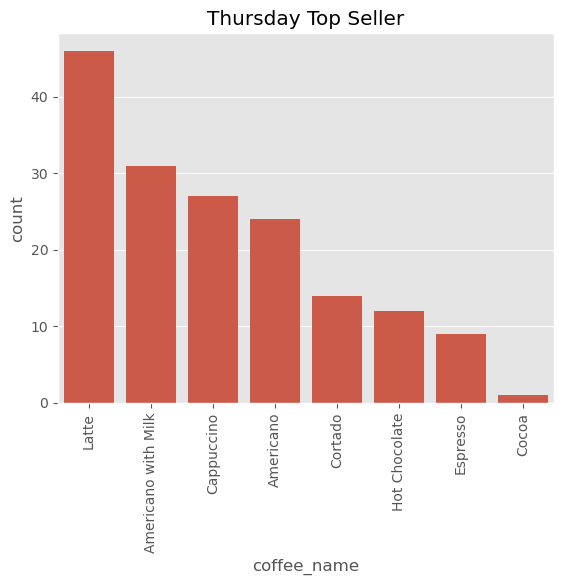

In [141]:
sb.barplot(x=Thursday_Top.index,y=Thursday_Top.values)
plt.xlabel('coffee_name')
plt.ylabel('count')
plt.title('Thursday Top Seller')
plt.xticks(rotation=90)

#### The above plot shows that on thursday latte is the most sold coffee and least sold is cocoa.

In [143]:
Friday_Top= data[data['Day']=='Friday']['coffee_name'].value_counts()
Friday_Top

coffee_name
Latte                  37
Americano with Milk    34
Americano              25
Cappuccino             23
Cortado                16
Hot Chocolate          13
Espresso                8
Cocoa                   7
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Latte'),
  Text(1, 0, 'Americano with Milk'),
  Text(2, 0, 'Americano'),
  Text(3, 0, 'Cappuccino'),
  Text(4, 0, 'Cortado'),
  Text(5, 0, 'Hot Chocolate'),
  Text(6, 0, 'Espresso'),
  Text(7, 0, 'Cocoa')])

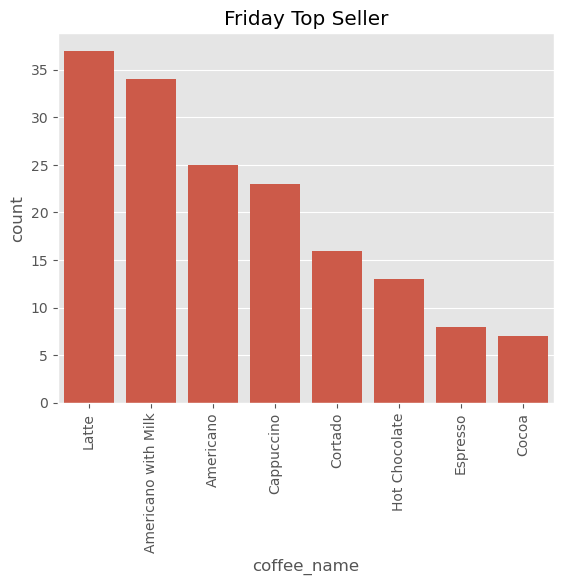

In [144]:
sb.barplot(x=Friday_Top.index,y=Friday_Top.values)
plt.xlabel('coffee_name')
plt.ylabel('count')
plt.title('Friday Top Seller')
plt.xticks(rotation=90)

#### The above plot shows that on friday Latte is the most sold coffee and least sold is cocoa.

In [146]:
Saturday_Top= data[data['Day']=='Saturday']['coffee_name'].value_counts()
Saturday_Top

coffee_name
Americano with Milk    48
Latte                  33
Cappuccino             31
Americano              17
Cortado                 8
Hot Chocolate           7
Cocoa                   6
Espresso                4
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Americano with Milk'),
  Text(1, 0, 'Latte'),
  Text(2, 0, 'Cappuccino'),
  Text(3, 0, 'Americano'),
  Text(4, 0, 'Cortado'),
  Text(5, 0, 'Hot Chocolate'),
  Text(6, 0, 'Cocoa'),
  Text(7, 0, 'Espresso')])

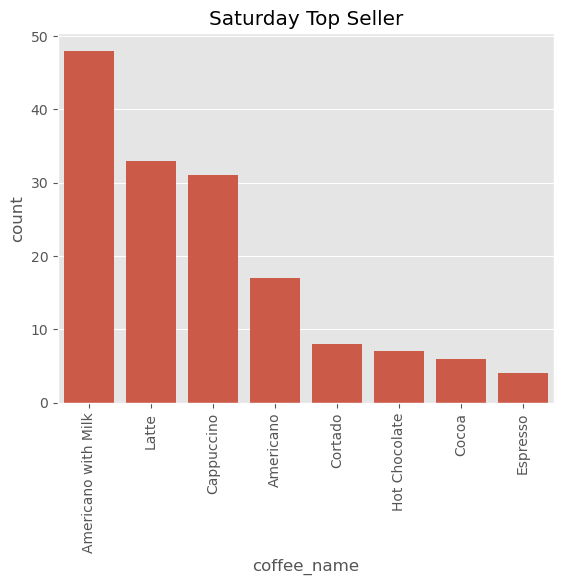

In [147]:
sb.barplot(x=Saturday_Top.index,y=Saturday_Top.values)
plt.xlabel('coffee_name')
plt.ylabel('count')
plt.title('Saturday Top Seller')
plt.xticks(rotation=90)

#### The above plot shows that on saturday Americano with Milk is the most sold coffee and least sold is espresso.

In [149]:
Sunday_Top = data[data['Day']=='Sunday']['coffee_name'].value_counts()
Sunday_Top

coffee_name
Americano with Milk    34
Latte                  33
Cappuccino             28
Americano              17
Cortado                14
Hot Chocolate          14
Espresso                8
Cocoa                   3
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Americano with Milk'),
  Text(1, 0, 'Latte'),
  Text(2, 0, 'Cappuccino'),
  Text(3, 0, 'Americano'),
  Text(4, 0, 'Cortado'),
  Text(5, 0, 'Hot Chocolate'),
  Text(6, 0, 'Espresso'),
  Text(7, 0, 'Cocoa')])

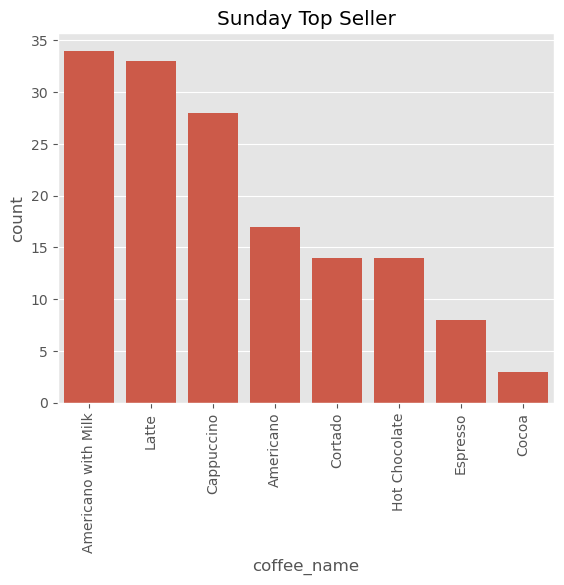

In [150]:
sb.barplot(x=Sunday_Top.index,y=Sunday_Top.values)
plt.xlabel('coffee_name')
plt.ylabel('count')
plt.title('Sunday Top Seller')
plt.xticks(rotation=90)

#### The above plot shows that on sunday Americano with Milk is the most sold coffee and least sold is cocoa.

## Conclusion:From the analysis above, we have uncovered valuable insights into customer shopping patterns on a monthly, day and hourly basis. We have identified the most popular coffee products and observed the shopping trends over time. These findings are instrumental in optimizing inventory planning, designing the layout of vending machines, and determining the ideal restock times for coffee products.